In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import os
import json
import pylab as pl
import matplotlib as plt
import statsmodels.api as sm

%pylab inline

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


/Applications/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


PUIDATA = os.getenv("PUIDATA")
print(PUIDATA)

from IPython.display import Image
Image(filename = PUIDATA + "/Homework10/Ridetypes.png")

mtaRides = np.load(PUIDATA + "/Homework10/MTA_Fare.npy")

In [2]:
mtaRides = np.load('MTA_Fare.npy')

In [3]:
mtaRides.shape

(600, 23, 194)

#### Task 1:

##### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.

##### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [4]:
rideType = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [5]:
week = []

for i in range(194):
    x = []
    for j in range(600):
        for k in range(23):
            x.append(mtaRides[j][k][i])
    i = sum(x)
    week.append(i)

In [6]:
week

[26716631,
 29262313,
 29597575,
 29383978,
 29182176,
 26208052,
 28680022,
 29122010,
 28800200,
 28595932,
 28308361,
 27927423,
 27268131,
 28246743,
 26683582,
 30015142,
 30180176,
 29048486,
 30065000,
 29168839,
 30323454,
 30186700,
 29983681,
 30049876,
 30125402,
 25160821,
 29185649,
 30577220,
 30103021,
 27557647,
 21799403,
 21792798,
 27479553,
 27108970,
 26010345,
 26430220,
 28656503,
 29100353,
 29573058,
 26718018,
 29176634,
 29397046,
 29876972,
 29673828,
 29521768,
 30172126,
 30193061,
 28496477,
 29031851,
 30394695,
 29988635,
 29949834,
 27144981,
 29846497,
 30162349,
 29975652,
 30294451,
 26740659,
 29964051,
 29471983,
 29249492,
 29426206,
 29059658,
 27976524,
 27921014,
 22981394,
 28139307,
 31992892,
 32503085,
 24294628,
 32156059,
 30744539,
 32638048,
 32901236,
 31950684,
 32127913,
 32474319,
 27028024,
 31805789,
 33120126,
 33170696,
 31931091,
 24562552,
 28046492,
 30001277,
 28037318,
 29384138,
 31197426,
 31670476,
 31123474,
 28230517,

In [7]:
tmean = np.mean(week)
tstd = np.std(week)

In [8]:
print(tmean, tstd)

29778001.6082 2984034.34784


In [9]:
thold = [(tmean + 3*tstd), (tmean - 3*tstd)]
thold

[38730104.651779145, 20825898.564715698]

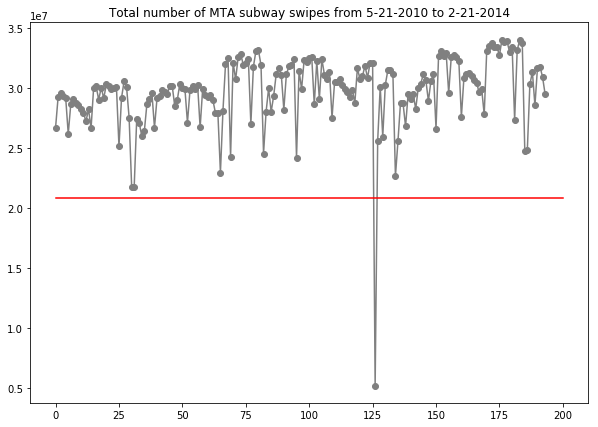

In [10]:
ax = figure(figsize = (10,7))
pl.plot(week,'o-', color = 'grey')
pl.plot((0,200), (thold[1],thold[1]), color = 'red')
plt.title("Total number of MTA subway swipes from 5-21-2010 to 2-21-2014")

##### Figure 1: Total number of MTA subway swipes between 5-21-2010 and 2-21-2014

In [11]:
for i in range(len(week)):
    if week[i] < thold[1]:
        print("Week there is fewer rides then 3 times the standard deviation away from the mta rides is week {}".format(i))

Week there is fewer rides then 3 times the standard deviation away from the mta rides is week 126


In [12]:
print("the number of rides for week 126 is {} rides".format(week[126]))

the number of rides for week 126 is 5215466 rides


#### Week 125 is the most prominent event in the time series was around the time that Superstorm Sandy hit NYC.

#### Task 2

##### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks

In [13]:
mtaRides = mtaRides.astype('float')
#mtaRides[mtaRides == -1] = 'nan'

In [14]:
mtaRides

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [ -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
          -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [15]:
station = np.nansum(mtaRides, axis = 1)
station = np.nansum(station, axis =1)
station.shape

(600,)

In [16]:
station

array([  2.31597950e+07,   4.00655200e+06,   1.40529600e+06,
         3.68935400e+06,   3.95201700e+06,   4.32044400e+06,
         2.68830000e+06,   2.50138300e+06,   2.19597400e+06,
         3.70933880e+07,   6.92062170e+07,   6.78716730e+07,
         2.10036140e+07,   3.58306370e+07,   2.42674080e+07,
         8.38726500e+06,   3.56461330e+07,   5.37318060e+07,
         1.72985500e+07,   6.26923300e+07,   4.17182070e+07,
         7.85456170e+07,   5.58699300e+07,   2.14841330e+07,
         3.22825070e+07,  -4.34700000e+03,   2.58960070e+07,
         2.55956110e+07,   5.43949560e+07,   2.28964960e+07,
         3.74583650e+07,   3.68138310e+07,   7.56932030e+07,
         8.70137100e+06,   2.64195650e+07,   5.52274600e+06,
         6.24009400e+06,   2.07957200e+06,   5.45829900e+06,
         8.43226900e+06,   2.12303970e+07,   4.81592800e+06,
         2.41520420e+07,   3.74642720e+07,   2.50291880e+07,
         7.66310590e+07,   4.24006960e+07,   1.12905670e+07,
         2.52577910e+07,

In [17]:
ticket = np.average(mtaRides, axis = 0, weights = station)
ticket.shape

(23, 194)

In [18]:
ticket

array([[  5.63402484e+04,   6.17841698e+04,   6.31951505e+04, ...,
          6.52804427e+04,   6.18597019e+04,   6.18519951e+04],
       [  2.57236374e+03,   2.85123662e+03,   2.86498247e+03, ...,
          3.35418133e+03,   3.25599896e+03,   3.27616952e+03],
       [  2.01274923e+02,   2.17849553e+02,   2.19504557e+02, ...,
          2.47692371e+02,   2.39929044e+02,   2.35334650e+02],
       ..., 
       [  1.40432414e+01,   1.39240500e+01,   1.47060283e+01, ...,
          1.27921872e+01,   1.37143056e+01,   1.46763535e+01],
       [  9.39637725e-01,   1.24184011e+00,   1.20614687e+00, ...,
          2.23136294e+00,   2.10028083e+00,   2.12192590e+00],
       [ -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00, ...,
          3.64281767e+03,   4.37550507e+03,   1.88482587e+03]])

<function matplotlib.pyplot.show>

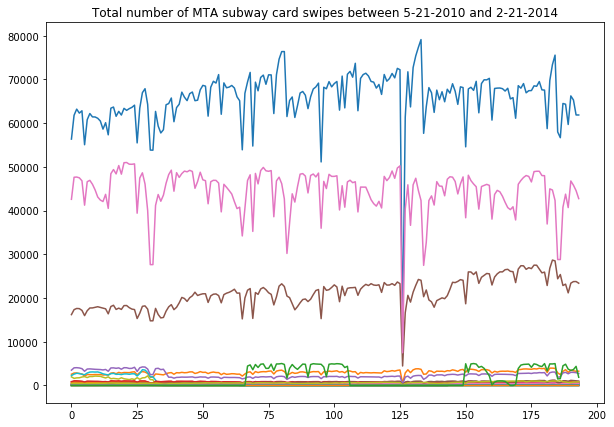

In [19]:
pl.figure = figure(figsize = (10,7))
for i in range(23):
    pl.plot(ticket[i])
plt.title("Total number of MTA subway card swipes between 5-21-2010 and 2-21-2014")
pl.show

##### Figure 2: Total number of MTA subway card swipes between 5-21-2010 and 2-21-2014

In [20]:
# get first 10 weeks and last 10 weeks for the 23 card types
firstLast = []

for i in range(23):
    z = []
    z.append(ticket[i][:10])
    z.append(ticket[i][-10:])
    z = (np.array(z)).flatten()
    firstLast.append(z)

In [21]:
np.array(firstLast).shape

(23, 20)

<function matplotlib.pyplot.show>

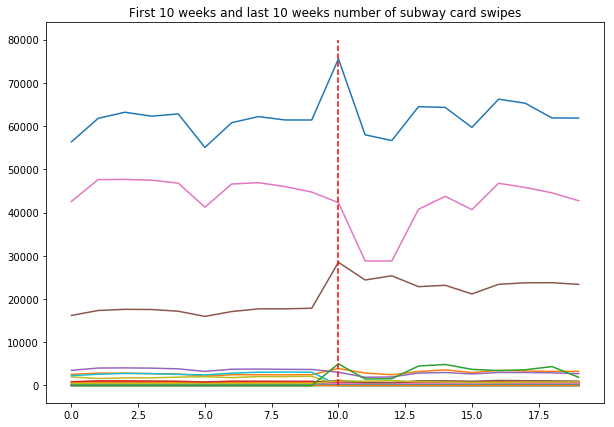

In [22]:
pl.figure = figure(figsize = (10,7))
for i in range(23):
    pl.plot(firstLast[i])
pl.plot((10,10),(0,80000),'--', color = 'red')
plt.title("First 10 weeks and last 10 weeks number of subway card swipes")
pl.show

##### Plot showing the first 10 and last 10 weeks number of subway card swipes

In [23]:
rideType

array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp', 'ez',
       'ff', 'mc', 'mr', 'month', 'rfm', 'rr', 'sen', 'spec', 'tcmc', 't',
       'umlim', 'xbus', 'stud'], 
      dtype='<U5')

In [24]:
# test if stationary

for i in range(len(ridetype)):
    stationaryTest = sm.tsa.adfuller(rideType)
print(stationaryTest)


NameError: name 'ridetype' is not defined

#### Task 3:
##### Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?

In [25]:
stations = np.nansum(mtaRides, axis = 1)

In [26]:
station.shape

(600,)

In [27]:
stations.shape

(600, 194)

<function matplotlib.pyplot.show>

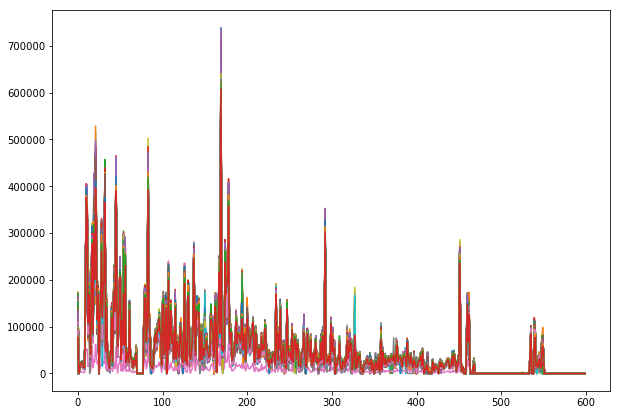

In [28]:
pl.figure = figure(figsize = (10,7))
pl.plot(stations,'-')
pl.show

<function matplotlib.pyplot.show>

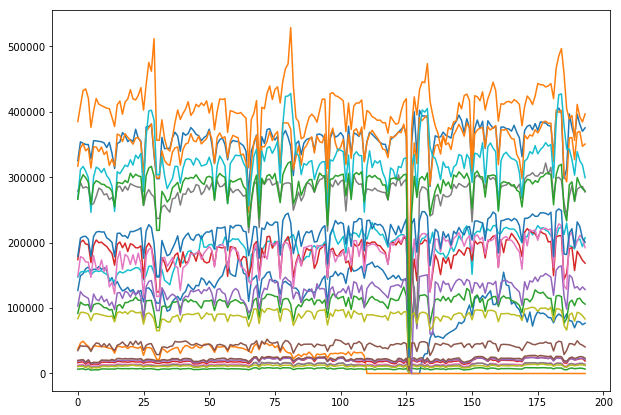

In [29]:
pl.figure = figure(figsize = (10,7))
for i in range(23):
    pl.plot(stations[i])
pl.show

In [30]:
(np.fft.rfft(stations).real)**2

array([[  5.36376104e+14,   1.21849568e+12,   1.84852527e+12, ...,
          7.18879396e+09,   1.49442311e+07,   3.41203701e+10],
       [  1.60524589e+13,   3.81561959e+10,   6.25898647e+10, ...,
          1.98492912e+06,   6.78000604e+08,   3.06030240e+09],
       [  1.97485685e+12,   9.08668627e+05,   2.80101317e+08, ...,
          8.61690075e+07,   3.53191308e+07,   8.20249600e+06],
       ..., 
       [  1.99094440e+07,   1.42420066e-24,   1.32220613e-24, ...,
          1.45686489e-30,   9.79750775e-32,   0.00000000e+00],
       [  1.99094440e+07,   1.42420066e-24,   1.32220613e-24, ...,
          1.45686489e-30,   9.79750775e-32,   0.00000000e+00],
       [  1.99094440e+07,   1.42420066e-24,   1.32220613e-24, ...,
          1.45686489e-30,   9.79750775e-32,   0.00000000e+00]])

In [31]:
N = len(stations)

In [32]:
print ("There are n=%d datapoints in the series"%N)

There are n=600 datapoints in the series


ValueError: x and y must have same first dimension, but have shapes (97,) and (300,)

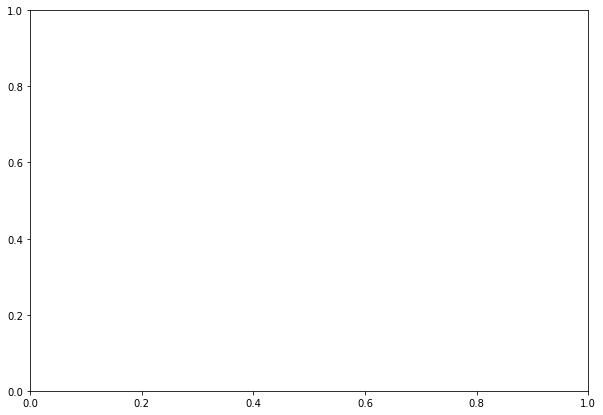

In [33]:
#f = (np.fft.rfft(station).real)**2

pl.figure = figure(figsize = (10,7))
for i in range(len(stations)):
    N = len(stations[i])
    f = (np.fft.rfft(station).real)**2
    pl.plot((1.0 / np.fft.rfftfreq(N, 1.0)[1:]), (f[1:]), '-')
pl.show